<a href="https://colab.research.google.com/github/sritharunkollu/Data-Analytics/blob/main/supermarketgrocerysales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y', errors='coerce')

In [ ]:
df.dropna(subset=['Order Date'], inplace=True)


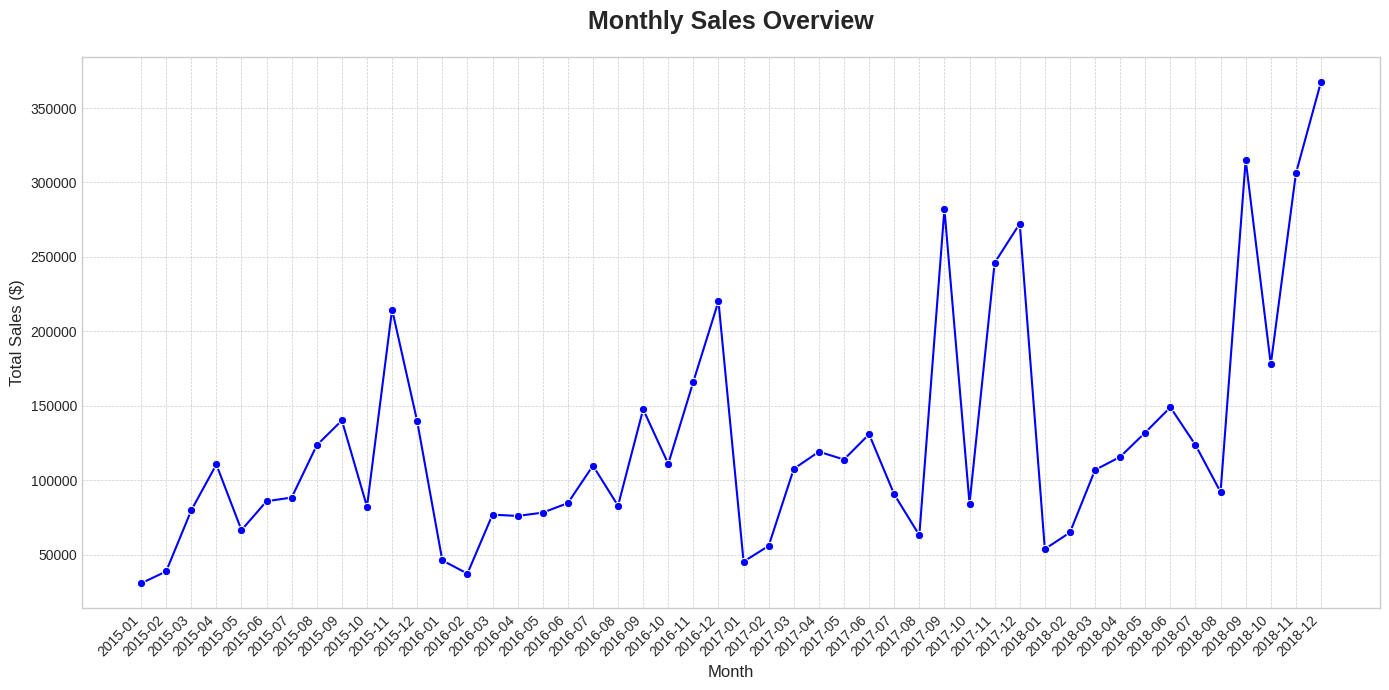

In [ ]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)
monthly_sales = monthly_sales.sort_values(by='YearMonth')
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o', color='b', ax=ax)
ax.set_title('Monthly Sales Overview', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-292367529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Category', data=profit_by_category, palette='plasma', ax=ax)


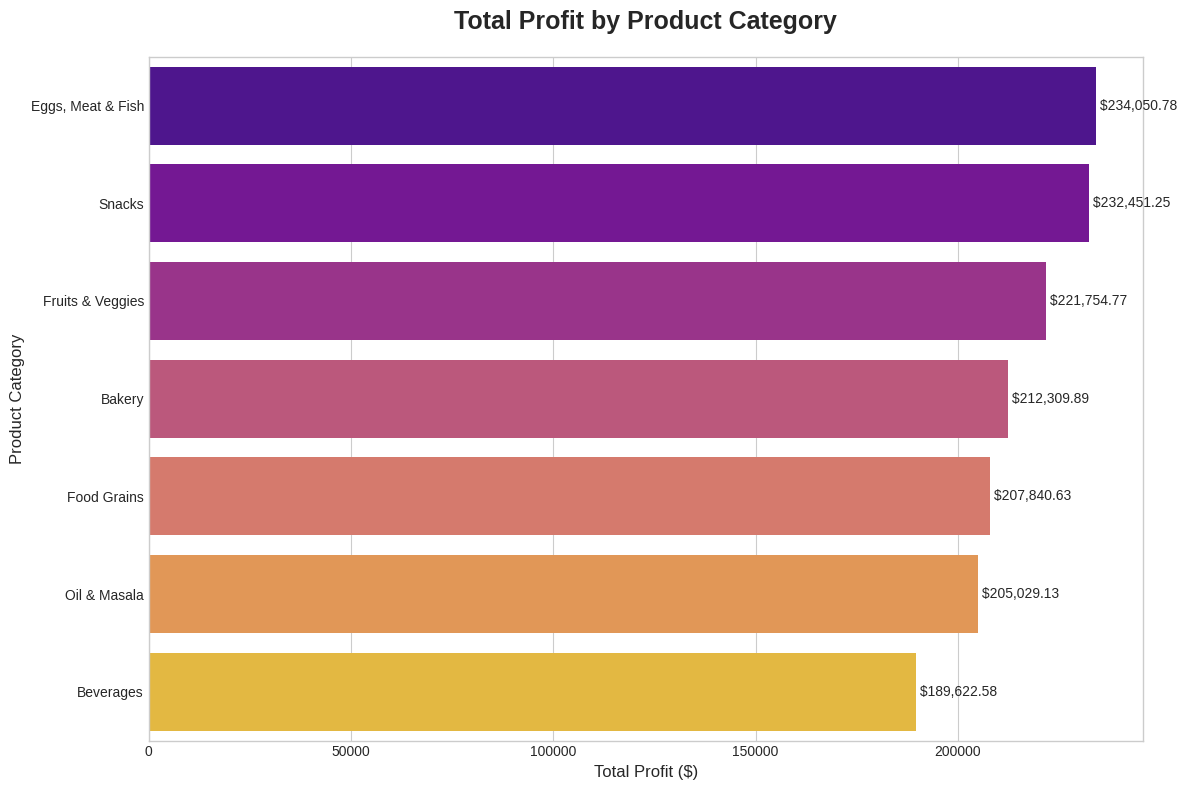

In [ ]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
profit_by_category = profit_by_category.sort_values(by='Profit', ascending=False)
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Profit', y='Category', data=profit_by_category, palette='plasma', ax=ax)
for index, value in enumerate(profit_by_category['Profit']):
    ax.text(value, index, f' ${value:,.2f}', va='center', fontsize=10)
    ax.set_title('Total Profit by Product Category', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Total Profit ($)', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

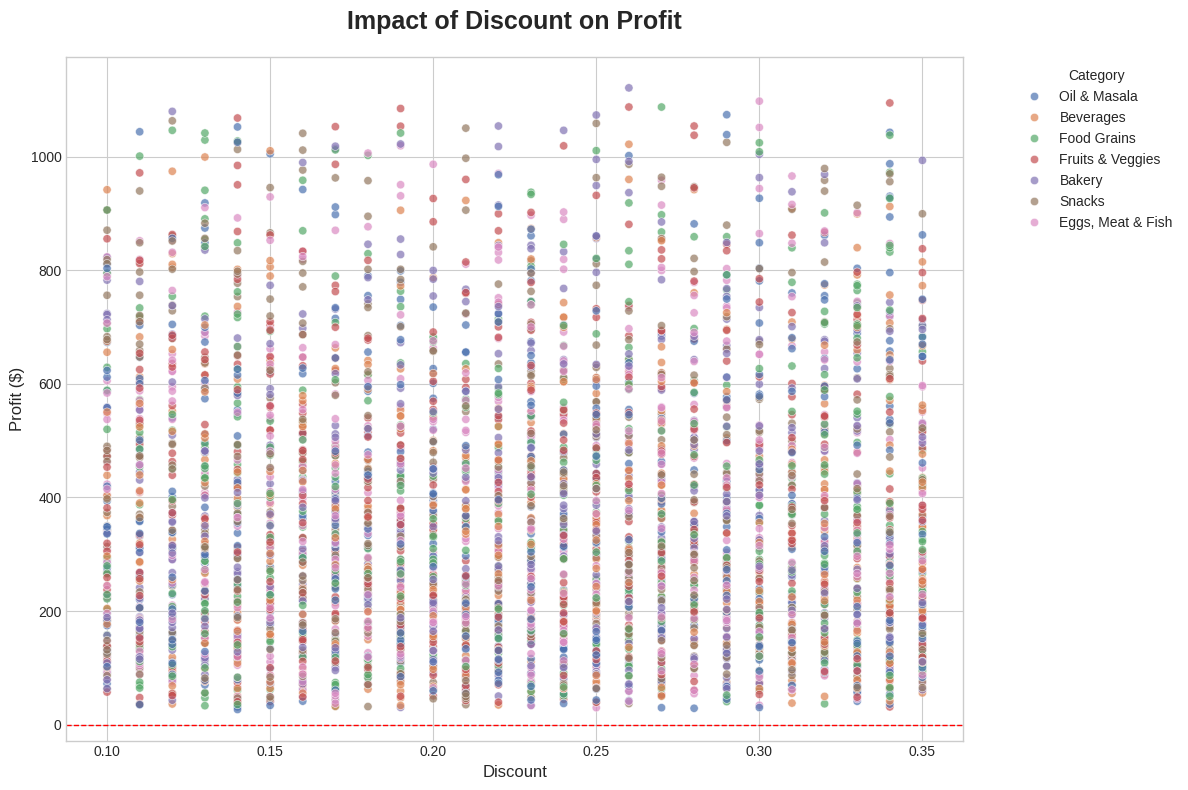

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='deep', alpha=0.7, ax=ax)
ax.set_title('Impact of Discount on Profit', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Discount', fontsize=12)
ax.set_ylabel('Profit ($)', fontsize=12)
ax.axhline(0, color='red', linestyle='--', linewidth=1)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()